In [13]:
import os
import numpy as np 
import pandas as pd
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick

path = "D:/Github/Predict_the_time_of_arrival_for_the_delivery_persons/dataset/data"

In [14]:
import random 
from datetime import datetime 

In [18]:
# Đọc file csv 

df = pd.read_csv("../dataset/dataset_clean.csv")

In [16]:
# Tính khoảng cách giữa cửa hàng và nơi giao hàng 
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295;   
    c = math.cos
    a = 0.5 - c((lat2 - lat1) * p)/2 + c(lat1 * p) * c(lat2 * p) * (1 - c((lon2 - lon1) * p))/2

    return 12742 * math.asin(math.sqrt(a))

def create_feature_distance(df):
    # Khởi tạo cột Distance có tất cả giá trị đều bằng 0
    df["Distance"] = 0

    for i in range(len(df)):
        df["Distance"][i:i+1] = distance(df["Restaurant_latitude"][i:i+1], df["Restaurant_longitude"][i:i+1],
                                        df["Delivery_location_latitude"][i:i+1],df["Delivery_location_longitude"][i:i+1])

    return df

In [5]:
sns.countplot(data = df, x = 'MSZoning')

ValueError: Could not interpret input 'MSZoning'

In [11]:
df = df.drop(df[df['Restaurant_latitude'] <= 0].index)
df = df.drop(df[df['Restaurant_longitude']<=0].index)
df = df.drop(df[df['Delivery_location_latitude']<=0].index)
df = df.drop(df[df['Delivery_location_longitude']<=0].index)
df = df.drop(df[df['Delivery_person_ratings'] > 5].index)
df["Multiple_deliveries"] = df["Multiple_deliveries"].replace(to_replace = 0, value= 1)

In [19]:
df['Restaurant_latitude'].sort_values()

19909     9.957144
17696     9.957144
6372      9.957144
17473     9.957144
2438      9.957144
           ...    
13881    30.914057
33744    30.914057
28816    30.914057
35074    30.914057
19506    30.914057
Name: Restaurant_latitude, Length: 41062, dtype: float64

In [17]:
df = df.drop(df[df['Multiple_deliveries'] ==0].index)

In [18]:
correlation = numeric_features.corr()
print(correlation['Time_taken_(min)'].sort_values(ascending = False),'\n')

Time_taken_(min)               1.000000
Multiple_deliveries            0.380700
Distance                       0.321647
Delivery_person_Age            0.297717
Delivery_location_latitude     0.015676
Restaurant_latitude            0.014070
Delivery_location_longitude    0.009011
Restaurant_longitude           0.008454
Index                          0.007835
Vehicle_condition             -0.243433
Delivery_person_ratings       -0.339375
Name: Time_taken_(min), dtype: float64 



<AxesSubplot:xlabel='City', ylabel='Time_taken_(min)'>

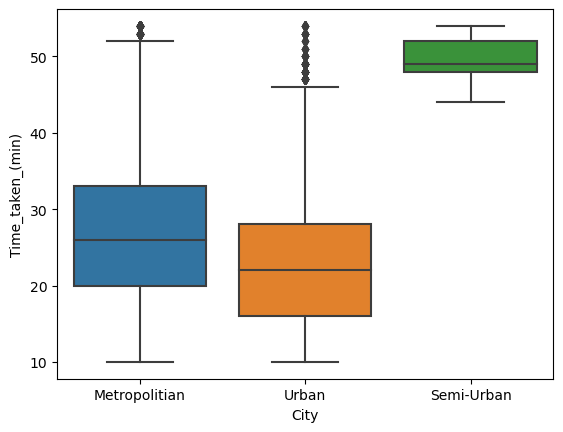

In [13]:
sns.boxplot(x = 'City', y ='Time_taken_(min)', data = df )

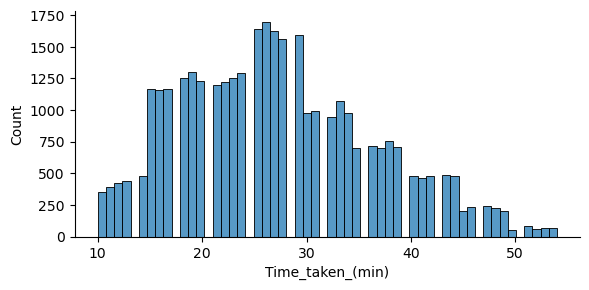

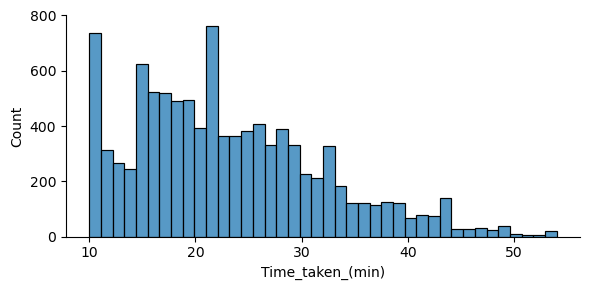

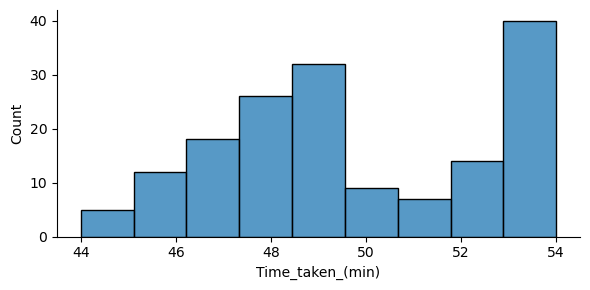

In [12]:
sns.displot(df[df['City'] == 'Metropolitian' ]['Time_taken_(min)'], height= 3, aspect=2)
sns.displot(df[df['City'] == 'Urban' ]['Time_taken_(min)'], height= 3, aspect=2)
sns.displot(df[df['City'] == 'Semi-Urban' ]['Time_taken_(min)'], height= 3, aspect=2)

In [10]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

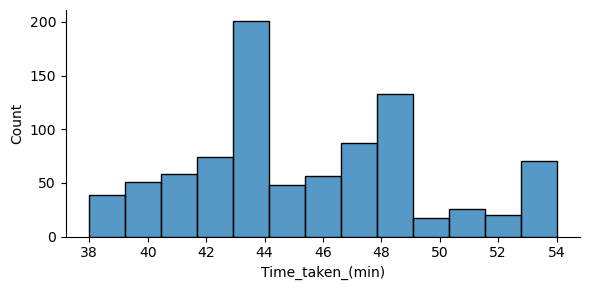

In [9]:
sns.displot(df[df['Festival'] == 'Yes' ]['Time_taken_(min)'], height= 3, aspect=2)

In [19]:
create_feature_distance(df)

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_828\2172271668.py:14: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_828\2172271668.py:15: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_828\2172271668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Index,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_order,Time_order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Distance,Time_taken_(min)
0,0,36.0,4.5,23.351058,85.325731,23.371058,85.345731,2022-03-24 11:25:00,2022-03-24 11:35:00,Cloudy,High,1,Drinks,motorcycle,1.0,No,Metropolitian,3.018911,25.0
1,1,37.0,4.7,12.934365,77.616155,13.024365,77.706155,2022-03-25 17:40:00,2022-03-25 17:50:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,13.973178,40.0
2,2,25.0,4.9,22.312790,73.170283,22.352790,73.210283,2022-03-19 13:40:00,2022-03-19 13:55:00,Cloudy,High,1,Drinks,scooter,1.0,No,Urban,6.058825,30.0
3,3,28.0,4.5,17.433809,78.386744,17.563809,78.516744,2022-03-10 23:35:00,2022-03-10 23:45:00,Sandstorms,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.975520,11.0
4,4,22.0,4.5,12.310972,76.659264,12.390972,76.739264,2022-03-10 20:40:00,2022-03-10 20:55:00,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,12.435540,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44994,44994,26.0,4.8,30.899992,75.831338,30.909992,75.841338,2022-02-11 10:00:00,2022-02-11 10:05:00,Cloudy,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,1.465159,21.0
44995,44995,28.0,4.7,26.891191,75.802083,26.911191,75.822083,2022-03-15 09:00:00,2022-03-15 09:15:00,Stormy,Low,2,Snack,scooter,1.0,No,Metropolitian,2.979763,18.0
44996,44996,30.0,3.8,15.561295,73.749478,15.651295,73.839478,2022-02-12 23:25:00,2022-02-12 23:35:00,Fog,Low,1,Drinks,scooter,1.0,No,Urban,13.894367,35.0
44997,44997,20.0,4.7,26.477750,80.351569,26.547750,80.421569,2022-02-18 23:30:00,2022-02-18 23:45:00,Sandstorms,Low,0,Snack,motorcycle,1.0,No,Metropolitian,10.444972,18.0


In [20]:
df.isnull().sum()

Index                          0
Delivery_person_Age            0
Delivery_person_ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_order                     0
Time_order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
Multiple_deliveries            0
Festival                       0
City                           0
Distance                       0
Time_taken_(min)               0
dtype: int64

<AxesSubplot:xlabel='Road_traffic_density', ylabel='Time_taken_(min)'>

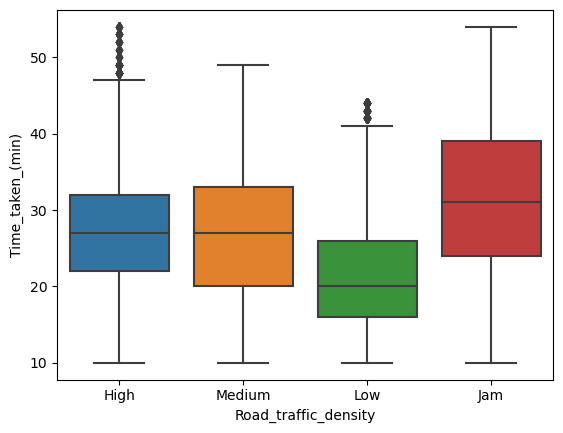

In [32]:
sns.boxplot(x = 'Road_traffic_density', y = 'Time_taken_(min)', data = df)

In [42]:
df_1 = df[:200]

In [74]:
a= np.sort(list(set(np.array(df['Distance']))))

In [77]:
a[-10:]

array([18390.21032675, 19064.81011689, 19065.10055571, 19066.15074213,
       19068.24696231, 19070.40810957, 19677.18055192, 19683.68756071,
       19688.00128805, 19692.67460647])

In [37]:

a = df.corr() 
print(a['Time_taken_(min)'].sort_values())

Delivery_person_ratings       -0.339375
Vehicle_condition             -0.243433
Road_traffic_density          -0.217004
Index                          0.007835
Restaurant_longitude           0.008454
Delivery_location_longitude    0.009011
Restaurant_latitude            0.014070
Delivery_location_latitude     0.015676
Delivery_person_Age            0.297717
Distance                       0.321647
Multiple_deliveries            0.380700
Time_taken_(min)               1.000000
Name: Time_taken_(min), dtype: float64


C:\Users\DUCNM\AppData\Local\Temp\ipykernel_4616\165315879.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [35]:
import seaborn as sns

<AxesSubplot:xlabel='Distance', ylabel='Time_taken_(min)'>

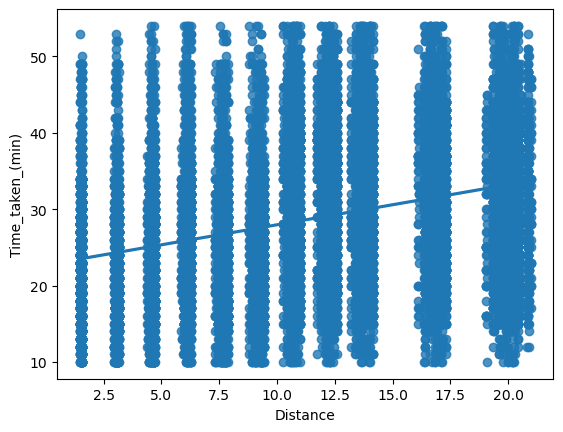

In [22]:
sns.regplot(x = 'Distance', y = 'Time_taken_(min)', data = df)

In [ ]:
a, b = stats

In [29]:
# df['Time_order'] = df['Order_date'] + ' ' + df['Time_order']

# df['Time_order_picked'] = df['Order_date'] + ' ' + df['Time_order_picked']

In [ ]:
# for i in range(len(df)):
#     df['Time_order'][i] = date_time(df['Time_order'][i])
#     df['Time_order_picked'][i] = date_time(df['Time_order_picked'][i])

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_35508\1794767946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_order'][i] = date_time(df['Time_order'][i])
C:\Users\DUCNM\AppData\Local\Temp\ipykernel_35508\1794767946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_order_picked'][i] = date_time(df['Time_order_picked'][i])


In [ ]:
# for i in range(len(df)):
#         if sum(np.array(df[i:i+1].isnull().sum())) > 3:
#             df = df.drop(df[i:i+1].index)

In [ ]:
# import random 
# df["Delivery_person_Age"] = df["Delivery_person_Age"].replace(to_replace = np.NaN, value= random.choice(np.array(df["Delivery_person_Age"])))
# df["Multiple_deliveries"] = df["Multiple_deliveries"].replace(to_replace = np.NaN, value= random.choice(np.array(df["Multiple_deliveries"])))
# df["Road_traffic_density"] = df["Road_traffic_density"].replace(to_replace = np.NaN, value= random.choice(np.array(df["Road_traffic_density"])))
# df["Weather_conditions"] = df["Weather_conditions"].replace(to_replace = np.NaN, value= random.choice(np.array(df["Weather_conditions"])))
# df["Delivery_person_ratings"] = df["Delivery_person_ratings"].replace(to_replace = np.NaN, value= random.choice(np.array(df["Delivery_person_ratings"])))


In [ ]:
df.isnull().sum()

Unnamed: 0                        0
ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_date                        0
Time_order                        0
Time_order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Multiple_deliveries               0
Festival                        228
City                           1200
Time_taken_(min)                  0
dtype: int64

In [ ]:
# import math 
# # Tính khoảng cách giữa cửa hàng và nơi giao hàng 
# def distance(lat1, lon1, lat2, lon2):
#     p = 0.017453292519943295;   
#     c = math.cos
#     a = 0.5 - c((lat2 - lat1) * p)/2 + c(lat1 * p) * c(lat2 * p) * (1 - c((lon2 - lon1) * p))/2

#     return 12742 * math.asin(math.sqrt(a))


In [ ]:
# df["Distance"] = 0

# for i in range(len(df)):
#     df["Distance"][i:i+1] = distance(df["Restaurant_latitude"][i:i+1], df["Restaurant_longitude"][i:i+1],
#                                      df["Delivery_location_latitude"][i:i+1],df["Delivery_location_longitude"][i:i+1])



In [ ]:
a = df['Time_order']

In [ ]:
df['Order_date'].unique()

array(['24-03-2022', '25-03-2022', '19-03-2022', '10-03-2022',
       '03-04-2022', '15-02-2022', '13-02-2022', '11-02-2022',
       '01-04-2022', '02-04-2022', '27-03-2022', '17-02-2022',
       '16-02-2022', '09-03-2022', '13-03-2022', '20-03-2022',
       '12-03-2022', '31-03-2022', '18-03-2022', '11-03-2022',
       '12-02-2022', '04-03-2022', '01-03-2022', '17-03-2022',
       '30-03-2022', '18-02-2022', '14-03-2022', '03-03-2022',
       '05-04-2022', '06-03-2022', '04-04-2022', '15-03-2022',
       '16-03-2022', '26-03-2022', '29-03-2022', '08-03-2022',
       '21-03-2022', '28-03-2022', '02-03-2022', '14-02-2022',
       '07-03-2022', '23-03-2022', '05-03-2022', '06-04-2022'],
      dtype=object)

In [ ]:
from datetime import datetime

In [ ]:
# for i in range(len(df)):
#     df['Order_date'][i] = datetime.strptime(df['Order_date'][i], "%d-%m-%Y") 
#     df['Time_order'][i] = datetime.strptime(df['Time_order'][i], "%H:%M")
#     df['Time_order_picked'][i] = datetime.strptime(df['Time_order_picked'][i], "%H:%M")

In [ ]:
a = '24-03-2022 8:30' 
b = '25-03-2022 8:30'

a = datetime.strptime(a, "%d-%m-%Y %H:%M")
b = datetime.strptime(b, "%d-%m-%Y %H:%M")

c = b-a
print(c)

1 day, 0:00:00


In [ ]:
a + c + c 

datetime.datetime(2022, 3, 26, 8, 30)

In [ ]:
a = '8:30' 
b = '8:40'

a = datetime.strptime(a, "%H:%M")
b = datetime.strptime(b, "%H:%M")

In [ ]:
from datetime import datetime

In [ ]:
a = '24-03-2022' +' ' '11:25'
a

'24-03-2022 11:25'

In [ ]:
# for i in range(len(df)):
#     df['Time_order'][i] = datetime.strptime(df['Time_order'][i], "%d-%m-%Y %H:%M")
#     df['Time_order_picked'][i] = datetime.strptime(df['Time_order_picked'][i], "%d-%m-%Y %H:%M")

In [ ]:
data_time_order_notnull = np.array(df[df['Time_order'] > str(0)]['Time_order'])
data_time_order_picked_notnull = np.array(df[df['Time_order'] > str(0)]['Time_order_picked'])

In [ ]:
from datetime import timedelta

In [ ]:
def date_time(date):
    date = str(date)
    if '23:60' in date:
        date = date.split(" ")
        date[0] = datetime.strptime(date[0], "%d-%m-%Y")
        date[1] = date[1].replace('23:60', "00:00")
        date[0] += timedelta(days=1)
        date[0] = str(date[0])
        date = date[0] + " " + date[1]
        date = date.replace('00:00:00', "")
        date = datetime.strptime(date, "%Y-%m-%d %H:%M")
        return date
    if '24:' in date:
        date = date.split(" ")
        date[0] = datetime.strptime(date[0], "%d-%m-%Y")
        date[1] = date[1].replace('24:', "00:")
        date[0] += timedelta(days=1)
        date[0] = str(date[0])
        date = date[0] + " " + date[1]
        date = date.replace('00:00:00', "")
        date = datetime.strptime(date, "%Y-%m-%d %H:%M")
        return date
    if ':60' in date:
        date = date.split(" ")
        date[0] = datetime.strptime(date[0], "%d-%m-%Y")
        date[0] = str(date[0])
        date[1] = date[1].replace('60', '00')
        date[1] = date[1].split(":")
        date[1] = str(int(date[1][0])+1) + ":" + date[1][1]
        date = date[0] + " " + date[1]
        date = date.replace('00:00:00', "")
        date = datetime.strptime(date, "%Y-%m-%d %H:%M")
        return date
    if '-' in date:
        date = date.split(" ")
        date[0] = datetime.strptime(date[0], "%d-%m-%Y")
        date[0] = str(date[0])
        date = date[0] + " " + date[1]
        date = date.replace('00:00:00', "")
        date = datetime.strptime(date, "%Y-%m-%d %H:%M")
        return date
    return date 

In [ ]:
print(date_time('24-03-2022 24:60'))

ValueError: unconverted data remains: 0

In [ ]:
a = '24-03-2022 00:25'
if '26' in a:
    print(5)
a = a.split(" ") 

In [ ]:
a[0]

'24-03-2022'

In [ ]:
a = '00:00'
a = a.replace('60','00')

a = a.split(":") 

a = str(int(a[0])+1) + ":" + a[1]
a

'1:00'

In [ ]:
for i in range(18):
    data_time_order_notnull[i] = datetime.strptime(data_time_order_notnull[i], "%H:%M")
    #data_time_order_picked_notnull[i] = datetime.strptime(data_time_order_picked_notnull[i], "%H:%M")

ValueError: unconverted data remains: 0

In [ ]:
data_time_order_notnull[:20]

array([datetime.datetime(1900, 1, 1, 11, 25),
       datetime.datetime(1900, 1, 1, 17, 40),
       datetime.datetime(1900, 1, 1, 13, 40),
       datetime.datetime(1900, 1, 1, 23, 35),
       datetime.datetime(1900, 1, 1, 20, 40),
       datetime.datetime(1900, 1, 1, 10, 45),
       datetime.datetime(1900, 1, 1, 9, 40),
       datetime.datetime(1900, 1, 1, 8, 30),
       datetime.datetime(1900, 1, 1, 18, 35),
       datetime.datetime(1900, 1, 1, 8, 20),
       datetime.datetime(1900, 1, 1, 20, 45),
       datetime.datetime(1900, 1, 1, 18, 15),
       datetime.datetime(1900, 1, 1, 21, 30),
       datetime.datetime(1900, 1, 1, 18, 25),
       datetime.datetime(1900, 1, 1, 23, 40),
       datetime.datetime(1900, 1, 1, 13, 55),
       datetime.datetime(1900, 1, 1, 14, 40), '10:60', '12:55', '9:25'],
      dtype=object)

In [ ]:
a = '24:00'
a = datetime.strptime(a, "%H:%M") 
print(a)

ValueError: time data '24:00' does not match format '%H:%M'

In [ ]:
set_data_time_order = set(data_time_order_picked_notnull)

In [ ]:
a = np.array(set_data_time_order)

In [ ]:
a

array({'16:05', '20:15', '23:05', '19:30', '15:30', '22:10', '17:45', '15:50', '10:15', '14:20', '21:20', '13:50', '18:40', '10:60', '19:05', '8:50', '22:45', '13:10', '10:50', '18:05', '16:35', '17:20', '24:05', '20:40', '16:30', '18:50', '17:60', '20:10', '8:25', '13:55', '23:40', '22:40', '18:15', '17:55', '9:15', '10:20', '8:40', '22:25', '9:10', '14:35', '16:25', '18:45', '18:55', '22:55', '21:40', '14:50', '11:40', '14:25', '17:40', '12:50', '16:10', '19:15', '21:35', '9:25', '14:15', '17:10', '22:60', '8:45', '12:60', '10:05', '13:20', '19:25', '10:25', '11:30', '17:50', '9:55', '19:55', '18:20', '10:10', '12:25', '13:05', '13:30', '22:15', '19:40', '20:35', '9:40', '15:60', '21:25', '23:55', '23:45', '13:40', '12:30', '12:20', '23:50', '14:45', '13:15', '13:25', '19:20', '14:10', '20:20', '10:30', '9:45', '11:50', '11:25', '11:15', '15:10', '8:30', '16:40', '9:05', '11:45', '8:35', '12:55', '11:20', '24:15', '11:05', '15:20', '12:15', '9:30', '21:15', '23:35', '22:05', '15:35',

In [ ]:
df[df['Time_order'] > str(0)]['Time_order']

0        11:25
1        17:40
2        13:40
3        23:35
4        20:40
         ...  
45587     9:60
45588     8:60
45589    23:25
45590    23:30
45591    23:20
Name: Time_order, Length: 43861, dtype: object

In [ ]:
a.isnull().sum()

1139

In [ ]:
a = '24-03-2022 8:30'
a = datetime.strptime(a, "%d-%m-%Y %H:%M")

In [ ]:
print(a)

2022-03-24 11:25:00


In [ ]:
df.isnull().sum()

Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_date                        0
Time_order                     1731
Time_order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Multiple_deliveries             993
Festival                          0
City                           1200
Time_taken_(min)                  0
Index                             0
Distance                          0
dtype: int64

In [ ]:
np.array(df["Order_date"])

array(['24-03-2022', '25-03-2022', '19-03-2022', ..., '12-02-2022',
       '18-02-2022', '09-03-2022'], dtype=object)

In [ ]:
from datetime import datetime
a = '8:30:00' 
dt_object1 = datetime.strptime(a, "%H:%M:%S")

In [ ]:
dt_object1.strftime("%H")

'08'

In [ ]:
res_las = np.array(df['Restaurant_latitude'])

np.sort(res_las) 

array([-30.905562, -30.902872, -30.902872, ...,  30.914057,  30.914057,
        30.914057])

In [ ]:
print(len(res_las))

print(len(set(res_las)))

45592
657


In [ ]:
dis = np.array(df['Distance'])

dis

array([ 3.01891148, 13.97317756,  6.05882517, ..., 13.89436656,
       10.44497153,  7.7718343 ])

In [ ]:
set(dis)

{1.5147814029387021,
 2.979521050245772,
 3.104632094129702,
 4.674174528666633,
 4.656983637835054,
 6.058825169237242,
 6.29013467758336,
 4.596336792048561,
 9.435201537103644,
 6.118711846640849,
 11.917680464440235,
 6.119039466421071,
 6.210607623138685,
 7.546267707012646,
 8.811839531264553,
 16.63531520323739,
 17.073624954178904,
 16.660097204528178,
 19.975520086223586,
 20.178267239101707,
 19.97609532002721,
 20.442929762531403,
 16.60127679032794,
 16.830914549936686,
 17.139219742239916,
 19.363204222098958,
 20.25296785008508,
 19.76027880154743,
 20.176414243690374,
 4.46931031973611,
 6.210543032439091,
 6.242456810744102,
 16414.93894076806,
 16418.720900940738,
 7.460848120421247,
 16421.727718703474,
 1.5580838613499712,
 1.5524171271974159,
 16421.429880097505,
 8.937527873219437,
 8.789993887912033,
 8.790530378160383,
 16423.476510124066,
 16429.11361392011,
 9.34812842317956,
 9.348068923198298,
 9.192496429439984,
 9.157648925353783,
 3.08801239398035,
 10.445

In [ ]:
df["Index"] = 0

for i in range(len(df)):
    df["Index"][i:i+1] = i 

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_20804\2865744451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Index"][i:i+1] = i


In [ ]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_date                        0
Time_order                     1731
Time_order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Multiple_deliveries             993
Festival                          0
City                           1200
Time_taken_(min)                  0
Index                             0
Distance                          0
dtype: int64

In [ ]:
len(df)

45592

In [ ]:
revgc.search((0, 0))

[{'lat': '4.88447',
  'lon': '-1.75536',
  'name': 'Takoradi',
  'admin1': 'Western',
  'admin2': '',
  'cc': 'GH'}]

Time_order_picked không có giá trị NaN 
Time_order có giá trị NaN

% ngày thường chiếm đều ~98% 
=> nhóm sẽ chuyển Festival sang giá trị No 

In [ ]:
df

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_date,Time_order,Time_order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Time_taken_(min)
0,23.351058,85.325731,23.371058,85.345731,24-03-2022,11:25,11:35,Cloudy,High,1,Drinks,motorcycle,1.0,No,Metropolitian,25.0
1,12.934365,77.616155,13.024365,77.706155,25-03-2022,17:40,17:50,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,40.0
2,22.312790,73.170283,22.352790,73.210283,19-03-2022,13:40,13:55,Cloudy,High,1,Drinks,scooter,1.0,No,Urban,30.0
3,17.433809,78.386744,17.563809,78.516744,10-03-2022,23:35,23:45,Sandstorms,Low,1,Drinks,motorcycle,0.0,No,Metropolitian,11.0
4,12.310972,76.659264,12.390972,76.739264,10-03-2022,20:40,20:55,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45587,30.899992,75.831338,30.909992,75.841338,11-02-2022,9:60,10:05,Cloudy,Low,0,Drinks,motorcycle,0.0,No,Metropolitian,21.0
45588,26.891191,75.802083,26.911191,75.822083,15-03-2022,8:60,9:15,Stormy,Low,2,Snack,scooter,1.0,No,Metropolitian,18.0
45589,15.561295,73.749478,15.651295,73.839478,12-02-2022,23:25,23:35,Fog,Low,1,Drinks,scooter,1.0,No,Urban,35.0
45590,26.477750,80.351569,26.547750,80.421569,18-02-2022,23:30,23:45,Sandstorms,Low,0,Snack,motorcycle,0.0,No,Metropolitian,18.0


In [ ]:
df[df['Festival'] == "No"] 

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_date,Time_order,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Time_taken_(min),Index
0,0x9012,RANCHIRES09DEL02,36.0,4.5,23.351058,85.325731,23.371058,85.345731,24-03-2022,11:25,...,Cloudy,High,1,Drinks,motorcycle,1.0,No,Metropolitian,25.0,0
1,0xb201,BANGRES11DEL03,37.0,4.7,12.934365,77.616155,13.024365,77.706155,25-03-2022,17:40,...,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,40.0,1
2,0xa657,VADRES06DEL01,25.0,4.9,22.312790,73.170283,22.352790,73.210283,19-03-2022,13:40,...,Cloudy,High,1,Drinks,scooter,1.0,No,Urban,30.0,2
3,0xab15,HYDRES05DEL02,28.0,4.5,17.433809,78.386744,17.563809,78.516744,10-03-2022,23:35,...,Sandstorms,Low,1,Drinks,motorcycle,0.0,No,Metropolitian,11.0,3
4,0x5be6,MYSRES13DEL02,22.0,4.5,12.310972,76.659264,12.390972,76.739264,10-03-2022,20:40,...,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,47.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45587,0xc9bb,LUDHRES08DEL01,26.0,4.8,30.899992,75.831338,30.909992,75.841338,11-02-2022,9:60,...,Cloudy,Low,0,Drinks,motorcycle,0.0,No,Metropolitian,21.0,45587
45588,0x3fb7,JAPRES15DEL02,28.0,4.7,26.891191,75.802083,26.911191,75.822083,15-03-2022,8:60,...,Stormy,Low,2,Snack,scooter,1.0,No,Metropolitian,18.0,45588
45589,0xda5f,GOARES07DEL03,30.0,3.8,15.561295,73.749478,15.651295,73.839478,12-02-2022,23:25,...,Fog,Low,1,Drinks,scooter,1.0,No,Urban,35.0,45589
45590,0xdea0,KNPRES010DEL01,20.0,4.7,26.477750,80.351569,26.547750,80.421569,18-02-2022,23:30,...,Sandstorms,Low,0,Snack,motorcycle,0.0,No,Metropolitian,18.0,45590


In [ ]:
list_date = df["Order_date"].unique()

arr = []
df_date_festival = pd.DataFrame(arr, columns=["Date", "Festival: Yes", "Festival: No", "Festival: NaN", "% No"])

list = []
for date in list_date:
    yes = (df[df["Order_date"]==date]['Festival'] == "Yes").sum()
    no =  (df[df["Order_date"]==date]['Festival'] == "No").sum()
    nan = len(df[df["Order_date"]==date]) - yes - no 
    a = [date, yes, no, nan, float(no/(no+yes)*100)]
    list.append(a)

for i in range(len(list)):
    df_date_festival.loc[i] = list[i]


df_date_festival

,Date,Festival: Yes,Festival: No,Festival: NaN,% No
0,24-03-2022,6,1147,9,99.479618
1,25-03-2022,45,928,2,95.375128
2,19-03-2022,9,1135,5,99.213287
3,10-03-2022,40,956,0,95.983936
4,03-04-2022,5,1160,13,99.570815
5,15-02-2022,7,935,3,99.256900
6,13-02-2022,4,945,8,99.578504
7,11-02-2022,1,966,3,99.896587
8,01-04-2022,5,1120,8,99.555556
9,02-04-2022,32,958,2,96.767677


In [ ]:
df_unique = []
for feature in df.columns:
    df_unique.append(df[feature].unique())
    print("Feature: " + feature + " : ")
    print("")
    print(df[feature].unique())
    print("-------------------------------------------------------------------------")

Feature: ID : 

['0xb379' '0x5d6d' '0x7a6a' ... '0x4f8d' '0x5eee' '0x5fb2']
-------------------------------------------------------------------------
Feature: Delivery_person_ID : 

['BANGRES18DEL02' 'BANGRES19DEL01' 'COIMBRES13DEL02' ... 'KOCRES04DEL01'
 'BHPRES06DEL03' 'GOARES03DEL03']
-------------------------------------------------------------------------
Feature: Delivery_person_Age : 

[34. 23. 38. 32. 22. 33. 35. 36. 21. 24. 29. 25. 31. 37. 27. 26. 20. nan
 28. 39. 30. 15. 50.]
-------------------------------------------------------------------------
Feature: Delivery_person_Ratings : 

[4.5 4.4 4.7 4.6 4.8 4.2 4.3 4.  4.9 4.1 5.  3.5 nan 3.8 3.9 3.7 2.6 2.5
 3.6 3.1 2.7 1.  3.2 3.3 6.  3.4 2.8 2.9 3. ]
-------------------------------------------------------------------------
Feature: Restaurant_latitude : 

[ 12.913041  12.914264  11.003669  12.972793  17.431668  23.369746
  12.352058  17.433809  30.327968  10.003064  18.56245   30.899584
  26.463504  19.176269  12.311072  18.

In [ ]:
df['Restaurant_latitude'].unique()

array([ 12.913041,  12.914264,  11.003669,  12.972793,  17.431668,
        23.369746,  12.352058,  17.433809,  30.327968,  10.003064,
        18.56245 ,  30.899584,  26.463504,  19.176269,  12.311072,
        18.592718,  17.426228,  22.552672,  18.563934,  23.357804,
        12.986047,  19.221315,  13.005801,  26.849596,  21.160522,
        12.934179,  18.51421 ,  11.022477,  21.160437,  15.51315 ,
        15.561295,   0.      ,  18.55144 ,  18.593481,  21.173343,
        17.451976,  12.972532,  13.064181,  19.121999,  21.149569,
        19.091458,  22.539129,  12.970324,  21.175975,  11.003681,
        10.96185 ,  27.165108,  26.88842 ,  26.913987,  12.3085  ,
        21.183434,  19.254567,  25.449659,  30.372202,  21.157735,
        21.186438,  12.935662,  17.431477,  12.933298,  22.311358,
        12.934365,  13.086438,  26.913483,  17.411028,  18.516216,
        15.5696  ,  19.876428,  12.939496,  23.374878, -27.163303,
        22.74806 ,  26.891191,  12.316967,  18.927584,  11.022

In [ ]:
len(df_unique[2])

23

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick


In [ ]:
a = np.array(df['Restaurant_latitude'])

In [ ]:
for i in range(len(df.columns)):
    print(str(df.columns[i]) + " : " + str(len(df_unique[i])))

ID : 45592
Delivery_person_ID : 1320
Delivery_person_Age : 23
Delivery_person_Ratings : 29
Restaurant_latitude : 657
Restaurant_longitude : 518
Delivery_location_latitude : 4373
Delivery_location_longitude : 4373
Order_Date : 44
Time_Orderd : 177
Time_Order_picked : 193
Weather_conditions : 7
Road_traffic_density : 5
Vehicle_condition : 4
Type_of_order : 4
Type_of_vehicle : 4
multiple_deliveries : 5
Festival : 3
City : 4
Time_taken_(min) : 45


In [33]:
# for feature in df.columns:
#         if feature in ('ID', 'Delivery_person_ID', 'Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude'
#     ,'Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked','Time_taken_(min)'):
#             continue
#         x = df[feature].value_counts()

#         trace = go.Pie(labels = x.index, values = x, textinfo= 'value')

#         #layout = go.Layout(title = feature)

#         fig = go.Figure(data= [trace])
        
#         py.iplot(fig, image_width = 25, image_height = 25)


In [ ]:
df['Time_taken_(min)']

0        33.0
1        26.0
2        21.0
3        30.0
4        26.0
         ... 
45587    32.0
45588    36.0
45589    16.0
45590    26.0
45591    36.0
Name: Time_taken_(min), Length: 45592, dtype: float64

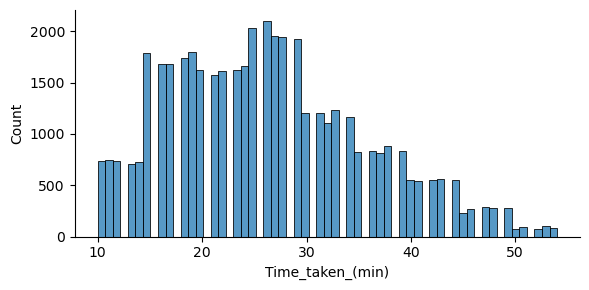

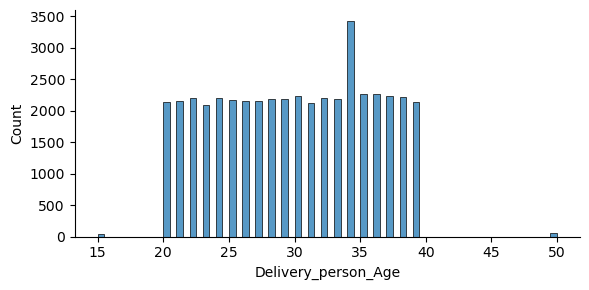

In [5]:
sns.displot(df['Time_taken_(min)'], height= 3, aspect=2)
sns.displot(df['Delivery_person_Age'], height= 3, aspect=2)

In [34]:
# slices = [((df['Delivery_person_Ratings'] >=1) & (df['Delivery_person_Ratings'] < 2)).sum(),
#         ((df['Delivery_person_Ratings'] >=2) & (df['Delivery_person_Ratings'] < 3)).sum(),
#         ((df['Delivery_person_Ratings'] >=3) & (df['Delivery_person_Ratings'] < 4)).sum(),
#         ((df['Delivery_person_Ratings'] >=4) & (df['Delivery_person_Ratings'] < 5)).sum(),
#         ((df['Delivery_person_Ratings'] >=5) & (df['Delivery_person_Ratings'] < 6)).sum()]

# labels = ['1 <= Rating < 2','2 <= Rating < 3','3 <= Rating < 4','4 <= Rating < 5','5 <= Rating < 6']

# # plt.pie(slices, labels= labels)
# # fig = plt.gcf()

# # fig.set_size_inches(4,4)

# # plt.show()

# x = df[feature].value_counts()

# trace = go.Pie(labels = labels, values = slices, textinfo= 'value')

# #layout = go.Layout(title = feature)

# fig = go.Figure(data= [trace])

# py.iplot(fig, image_width = 25, image_height = 25)

In [ ]:
x = df_unique[18][:3]
y = np.array(df['City'].value_counts())
print(x)
print(y)

['Metropolitian' 'Urban' 'Semi-Urban']
[34093 10135   164]


In [ ]:
df_unique

[array(['0xb379', '0x5d6d', '0x7a6a', ..., '0x4f8d', '0x5eee', '0x5fb2'],
       dtype=object),
 array(['BANGRES18DEL02', 'BANGRES19DEL01', 'COIMBRES13DEL02', ...,
        'KOCRES04DEL01', 'BHPRES06DEL03', 'GOARES03DEL03'], dtype=object),
 array([34., 23., 38., 32., 22., 33., 35., 36., 21., 24., 29., 25., 31.,
        37., 27., 26., 20., nan, 28., 39., 30., 15., 50.]),
 array([4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.9, 4.1, 5. , 3.5, nan,
        3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
        2.8, 2.9, 3. ]),
 array([ 12.913041,  12.914264,  11.003669,  12.972793,  17.431668,
         23.369746,  12.352058,  17.433809,  30.327968,  10.003064,
         18.56245 ,  30.899584,  26.463504,  19.176269,  12.311072,
         18.592718,  17.426228,  22.552672,  18.563934,  23.357804,
         12.986047,  19.221315,  13.005801,  26.849596,  21.160522,
         12.934179,  18.51421 ,  11.022477,  21.160437,  15.51315 ,
         15.561295,   0.      ,  18.55144 ,  18.5

In [ ]:
# list_set_ID = set(df['ID'])
# list_set_Delivery_person_ID = set(df['Delivery_person_ID']) 
# list_set_Delivery_person_Age = set(df['Delivery_person_Age'])
# list_set_Delivery_person_Ratings = set(df['Delivery_person_Ratings'])
# list_set_Restaurant_latitude = set(df['Restaurant_latitude'])
# list_set_Restaurant_longitude = set(df['Restaurant_longitude']) 
# list_set_Delivery_location_latitude = set(df['Delivery_location_latitude'])
# list_set_Delivery_location_longitude = set(df['Delivery_location_longitude'])
# list_set_Order_Date = set(df['Order_Date']) 
# list_set_Time_Orderd = set(df['Time_Orderd'])
# list_set_Time_Order_picked = set(df['Time_Order_picked'])
# list_set_Weather_conditions = set(df['Weather_conditions']) 
# list_set_Road_traffic_density = set(df['Road_traffic_density'])
# list_set_Vehicle_condition = set(df['Vehicle_condition'])
# list_set_Type_of_order = set(df['Type_of_order'])
# list_set_Type_of_vehicle = set(df['Type_of_vehicle'])
# list_set_multiple_deliveries = set(df['multiple_deliveries']) 
# list_set_Festival = set(df['Festival'])
# list_set_City = set(df['City'])
# list_set_Time_taken = set(df['Time_taken_(min)']) 